# Astronomy Events Analysis

In [2]:
import pandas as pd

In [3]:
url = "http://www.seasky.org/astronomy/astronomy-calendar-2030.html"

In [ ]:
tables = pd.read_html(url)

In [5]:
import requests
from bs4 import BeautifulSoup

In [6]:
response = requests.get(url) # get request

In [7]:
response.status_code

200

In [ ]:
response.content

In [9]:
first_1000_characters = response.content[:1000]
print(first_1000_characters)

b'<!doctype html>\n<html>\n<head>\n<meta charset="UTF-8">\n<title>Astronomy Calendar of Celestial Events 2030 - Sea and Sky</title>\n<meta name="description" content="This astronomy calendar of celestial events contains dates for notable astonomical events in 2030 including moon phases, meteor showers, eclipses, planetary alignments, occultations, oppositions, conjunctions, comets, asteroids, and astronomy events.">\n<link href="astronomy.css" rel="stylesheet" type="text/css">\n</head>\n\n<body id="calendar" class="oneColFixCtrHdr">\n<!-- begin #container -->\n<div id="container">\n<div id="header-spacer"> </div>\n<!-- begin #header -->\n  <div id="header">\n    <style>\r\n@charset "utf-8";\r\n#header01 {\r\n\tposition: absolute;\r\n\twidth: 167px;\r\n\theight: 122px;\r\n\tz-index: 1;\r\n\tleft: 0px;\r\n\ttop: 0px;\r\n}\r\n#header02 {\r\n\tposition: absolute;\r\n\twidth: 430px;\r\n\theight: 122px;\r\n\tz-index: 1;\r\n\tleft: 167px;\r\n\ttop: 0;\r\n}\r\n#header03 {\r\n\tposition: absolu

In [10]:
# Parse the HTML content
soup = BeautifulSoup(response.content)

In [ ]:
print(soup)

In [12]:
# Create a list to store all events in
event_list = []

# Write a loop over all <li> events that have a class attribute
for event in soup.find_all("li", class_=True):
    # Each individual event!
    print("New event:")
    print(event)

New event:
<li class="b9">
<p><span class="date-text">January 3, 4</span> - <span class="title-text">Quadrantids Meteor Shower.</span> The Quadrantids is an above average shower, with up to 40 meteors per hour at its peak. It is thought to be produced by dust grains left behind by an extinct comet known as 2003 EH1, which was discovered in 2003. The shower runs annually from January 1-5. It peaks this year on the night of the 3rd and  morning of the 4th. The new moon means dark skies and optimal viewing conditions for what should be an excellent show. Best viewing will be from a dark location after midnight. Meteors will radiate from the constellation Bootes, but can appear anywhere in the sky.</p>
</li>
New event:
<li class="b1">
<p><span class="date-text">January 4</span> - <span class="title-text">New Moon.</span> The Moon will located on the same side of the Earth as the Sun and will not be visible in the night sky. This phase occurs at 02:50 UTC. This is the best time of the month

In [16]:
# Create a list to store all events in
event_list = []

# Write a loop over all <li> events that have a class attribute
for event in soup.find_all("li", class_=True):
    # Each individual event!

    # Identify the span with the class "date-text", save as date
    date = event.find("span", class_="date-text").text

    # Identify span with class "title-text", save as title & extract text
    title = event.find("span", class_="title-text").text

    # Identify the paragraph tag, save as description & extract text
    description = event.find("p").text

    # Create a list containing the date, title, and description text
    event_row = [date, title, description]

    # Add list to list of events
    event_list.append(event_row)

In [17]:
event_list[0]

['January 3, 4',
 'Quadrantids Meteor Shower.',
 'January 3, 4 - Quadrantids Meteor Shower. The Quadrantids is an above average shower, with up to 40 meteors per hour at its peak. It is thought to be produced by dust grains left behind by an extinct comet known as 2003 EH1, which was discovered in 2003. The shower runs annually from January 1-5. It peaks this year on the night of the 3rd and  morning of the 4th. The new moon means dark skies and optimal viewing conditions for what should be an excellent show. Best viewing will be from a dark location after midnight. Meteors will radiate from the constellation Bootes, but can appear anywhere in the sky.']

In [15]:
len(event_list[0])

3

In [18]:
df = pd.DataFrame(event_list)

In [19]:
df.head()

,0,1,2
0,"January 3, 4",Quadrantids Meteor Shower.,"January 3, 4 - Quadrantids Meteor Shower. The ..."
1,January 4,New Moon.,January 4 - New Moon. The Moon will located on...
2,January 19,Full Moon.,January 19 - Full Moon. The Moon will be locat...
3,January 22,Mercury at Greatest Western Elongation.,January 22 - Mercury at Greatest Western Elong...
4,February 2,New Moon.,February 2- New Moon. The Moon will located on...


In [ ]:
# Create a list to store all events in

# Write a loop over all <li> events that have a class attribute

    # Identify the span with the class "date-text", save as date & extract text

    # Identify span with class "title-text", save as title & extract text

    # Identify the paragraph tag, save as description & extract text

    # Create a list containing the date, title, and description text

    # Add list to list of events

In [20]:
# Assuming 'soup' is a BeautifulSoup object containing your HTML data
events_list = []

# Loop over all <li> elements with a class attribute
for event in soup.find_all('li', class_=True):
    # Extract the date text
    date = event.find('span', class_='date-text').get_text(strip=True)
    
    # Extract the title text
    title = event.find('span', class_='title-text').get_text(strip=True)
    
    # Extract the description text
    description = event.find('p').get_text(strip=True)
    
    # Create a list of the extracted information
    event_details = [date, title, description]
    
    # Add the list to the events list
    events_list.append(event_details)

# Create a DataFrame from the list of events
events_df = pd.DataFrame(events_list, columns=['Date', 'Title', 'Description'])

# Display the DataFrame
print(events_df)

               Date                                    Title  \
0      January 3, 4               Quadrantids Meteor Shower.   
1         January 4                                New Moon.   
2        January 19                               Full Moon.   
3        January 22  Mercury at Greatest Western Elongation.   
4        February 2                                New Moon.   
5       February 18                               Full Moon.   
6           March 4                                New Moon.   
7          March 17    Venus at Greatest Western Elongation.   
8          March 19                               Full Moon.   
9          March 20                           March Equinox.   
10          April 2                                New Moon.   
11          April 4  Mercury at Greatest Eastern Elongation.   
12         April 18                               Full Moon.   
13     April 22, 23                    Lyrids Meteor Shower.   
14            May 2                     

In [21]:
df.head()

,0,1,2
0,"January 3, 4",Quadrantids Meteor Shower.,"January 3, 4 - Quadrantids Meteor Shower. The ..."
1,January 4,New Moon.,January 4 - New Moon. The Moon will located on...
2,January 19,Full Moon.,January 19 - Full Moon. The Moon will be locat...
3,January 22,Mercury at Greatest Western Elongation.,January 22 - Mercury at Greatest Western Elong...
4,February 2,New Moon.,February 2- New Moon. The Moon will located on...


In [24]:
df.columns = ["date", "title", "description"]

In [25]:
df.head()

,date,title,description
0,"January 3, 4",Quadrantids Meteor Shower.,"January 3, 4 - Quadrantids Meteor Shower. The ..."
1,January 4,New Moon.,January 4 - New Moon. The Moon will located on...
2,January 19,Full Moon.,January 19 - Full Moon. The Moon will be locat...
3,January 22,Mercury at Greatest Western Elongation.,January 22 - Mercury at Greatest Western Elong...
4,February 2,New Moon.,February 2- New Moon. The Moon will located on...


In [26]:
df["title"] = df["title"].str.replace(".","")

In [27]:
df.head()

,date,title,description
0,"January 3, 4",Quadrantids Meteor Shower,"January 3, 4 - Quadrantids Meteor Shower. The ..."
1,January 4,New Moon,January 4 - New Moon. The Moon will located on...
2,January 19,Full Moon,January 19 - Full Moon. The Moon will be locat...
3,January 22,Mercury at Greatest Western Elongation,January 22 - Mercury at Greatest Western Elong...
4,February 2,New Moon,February 2- New Moon. The Moon will located on...


In [28]:
df["date"]

0        January 3, 4
1           January 4
2          January 19
3          January 22
4          February 2
5         February 18
6             March 4
7            March 17
8            March 19
9            March 20
10            April 2
11            April 4
12           April 18
13       April 22, 23
14              May 2
15           May 6, 7
16             May 13
17             May 17
18             May 21
19             June 1
20            June 1 
21            June 15
22            June 15
23            June 21
24            June 30
25            July 15
26        July 28, 29
27            July 30
28           August 2
29      August 12, 13
30          August 13
31          August 28
32       September 11
33       September 15
34       September 22
35       September 27
36          October 5
37          October 7
38         October 11
39     October 21, 22
40         October 26
41      November 4, 5
42        November 10
43    November 17, 18
44        November 25
45        

In [29]:
df["date"] = df["date"].str.split(",").str[0]

In [30]:
df.head()

,date,title,description
0,January 3,Quadrantids Meteor Shower,"January 3, 4 - Quadrantids Meteor Shower. The ..."
1,January 4,New Moon,January 4 - New Moon. The Moon will located on...
2,January 19,Full Moon,January 19 - Full Moon. The Moon will be locat...
3,January 22,Mercury at Greatest Western Elongation,January 22 - Mercury at Greatest Western Elong...
4,February 2,New Moon,February 2- New Moon. The Moon will located on...


In [31]:
df["description"][0]

'January 3, 4 - Quadrantids Meteor Shower. The Quadrantids is an above average shower, with up to 40 meteors per hour at its peak. It is thought to be produced by dust grains left behind by an extinct comet known as 2003 EH1, which was discovered in 2003. The shower runs annually from January 1-5. It peaks this year on the night of the 3rd and  morning of the 4th. The new moon means dark skies and optimal viewing conditions for what should be an excellent show. Best viewing will be from a dark location after midnight. Meteors will radiate from the constellation Bootes, but can appear anywhere in the sky.'

In [32]:
df["description"] = df["description"].str.split(".", n=1).str[1] # only splits one time

In [33]:
df.head()

,date,title,description
0,January 3,Quadrantids Meteor Shower,"The Quadrantids is an above average shower, w..."
1,January 4,New Moon,The Moon will located on the same side of the...
2,January 19,Full Moon,The Moon will be located on the opposite side...
3,January 22,Mercury at Greatest Western Elongation,The planet Mercury reaches greatest western e...
4,February 2,New Moon,The Moon will located on the same side of the...


In [34]:
df.dtypes

date           object
title          object
description    object
dtype: object

In [35]:
from helper_functions import convert_datetime_column # in helper_functions.py

In [36]:
df = convert_datetime_column(df, "date", 2030)

In [37]:
df.head()

,date,title,description
0,2030-01-03,Quadrantids Meteor Shower,"The Quadrantids is an above average shower, w..."
1,2030-01-04,New Moon,The Moon will located on the same side of the...
2,2030-01-19,Full Moon,The Moon will be located on the opposite side...
3,2030-01-22,Mercury at Greatest Western Elongation,The planet Mercury reaches greatest western e...
4,2030-02-02,New Moon,The Moon will located on the same side of the...


In [38]:
# how many events per month?
df["date"].dt.month.value_counts().sort_index()

date
1.0     4
2.0     2
3.0     4
4.0     4
5.0     5
6.0     5
7.0     3
8.0     4
9.0     4
10.0    5
11.0    7
12.0    7
Name: count, dtype: int64

<Axes: xlabel='date'>

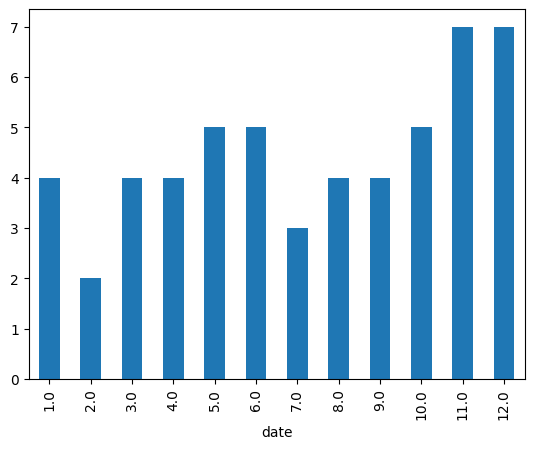

In [44]:
df["date"].dt.month.value_counts().sort_index().plot(kind="bar")

In [45]:
df.head()

,date,title,description
0,2030-01-03,Quadrantids Meteor Shower,"The Quadrantids is an above average shower, w..."
1,2030-01-04,New Moon,The Moon will located on the same side of the...
2,2030-01-19,Full Moon,The Moon will be located on the opposite side...
3,2030-01-22,Mercury at Greatest Western Elongation,The planet Mercury reaches greatest western e...
4,2030-02-02,New Moon,The Moon will located on the same side of the...


In [46]:
df["description"][0]

' The Quadrantids is an above average shower, with up to 40 meteors per hour at its peak. It is thought to be produced by dust grains left behind by an extinct comet known as 2003 EH1, which was discovered in 2003. The shower runs annually from January 1-5. It peaks this year on the night of the 3rd and  morning of the 4th. The new moon means dark skies and optimal viewing conditions for what should be an excellent show. Best viewing will be from a dark location after midnight. Meteors will radiate from the constellation Bootes, but can appear anywhere in the sky.'

In [47]:
df["description"][1]

' The Moon will located on the same side of the Earth as the Sun and will not be visible in the night sky. This phase occurs at 02:50 UTC. This is the best time of the month to observe faint objects such as galaxies and star clusters because there is no moonlight to interfere.'

In [48]:
# Regex pattern to match time in HH:MM or H:MM format
time_pattern = r'\b(\d{1,2}:\d{2})\b'

# Extract the first instance of the time pattern
df['time'] = df['description'].str.extract(time_pattern)


In [49]:
df.head()

,date,title,description,time
0,2030-01-03,Quadrantids Meteor Shower,"The Quadrantids is an above average shower, w...",NaN
1,2030-01-04,New Moon,The Moon will located on the same side of the...,02:50
2,2030-01-19,Full Moon,The Moon will be located on the opposite side...,15:55
3,2030-01-22,Mercury at Greatest Western Elongation,The planet Mercury reaches greatest western e...,NaN
4,2030-02-02,New Moon,The Moon will located on the same side of the...,16:08
